# Taller 3 Regresión y Clustering

Este taller es para realizar problemas de Regression y Clasificación 

## Punto 1. Defina un Dataset

Encuentre dos data set a utilizar:
+ Uno para un problema de clasificación
+ Uno para un problema de regression

__Recomendación:__ Utilize los dataset disponisble en la librería scikit-learn http://scikit-learn.org/stable/datasets/

Cada uno escoja un par de dataset diferentes.

In [46]:
import numpy as np #libreria de datos numericos
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as smf
import pylab as pl
from sklearn import datasets

%matplotlib inline


from sklearn import datasets

# 2.1. Linear Regression with the Advertising database

In [7]:

data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col= 0) # Data from the book: An introduction to Statistical learning

data.head()



,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### What are the features?

   + TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
   + Radio: advertising dollars spent on Radio
   + Newspaper: advertising dollars spent on Newspaper
    
### What is the response?
   + Sales: sales of a single product in a given market (in thousands of widgets)

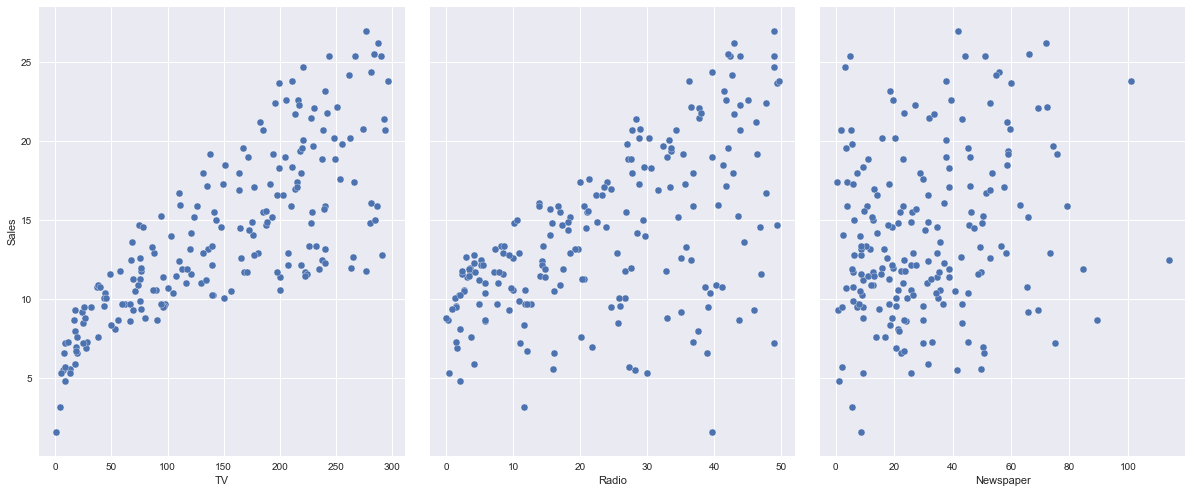

In [8]:
## SEABORN ##

sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.8) 

# Seaborn library allows to display data, manipulate and analyze 


The TV vs. Sales plot shows that, aparently, there is a proportional increasement in Sales as the TV advertising is increassing. Therefore, it is suggested that Sales increass lineraly with the increassment of the TV advertising. The model wich can exlpain the behavior of the data is:


                                      





$y = \beta_0 + \beta_1x$

Together, $\beta_0$ and $\beta_1$ are called the model coefficients. However, $\beta_0$ is called the intercept. It means that $y$ reach $\beta_0$ when the others parameters are equal to 0



First of all, there are several ways to determine the values of the intercept and parameters of the model. 1) using STATSMODELS and 2) using SCIKIT-LEARN .

In [9]:
### STATSMODELS ###

# create a fitted model
lm1 = smf.ols(formula='Sales ~ TV', data=data).fit() 

# print the coefficients
lm1.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [10]:
### SCIKIT-LEARN ###

from sklearn.linear_model import LinearRegression

# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.Sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print lm2.intercept_
print lm2.coef_

7.03259354913
[ 0.04753664]


Now, let's see if the data fits a lineal regression model.

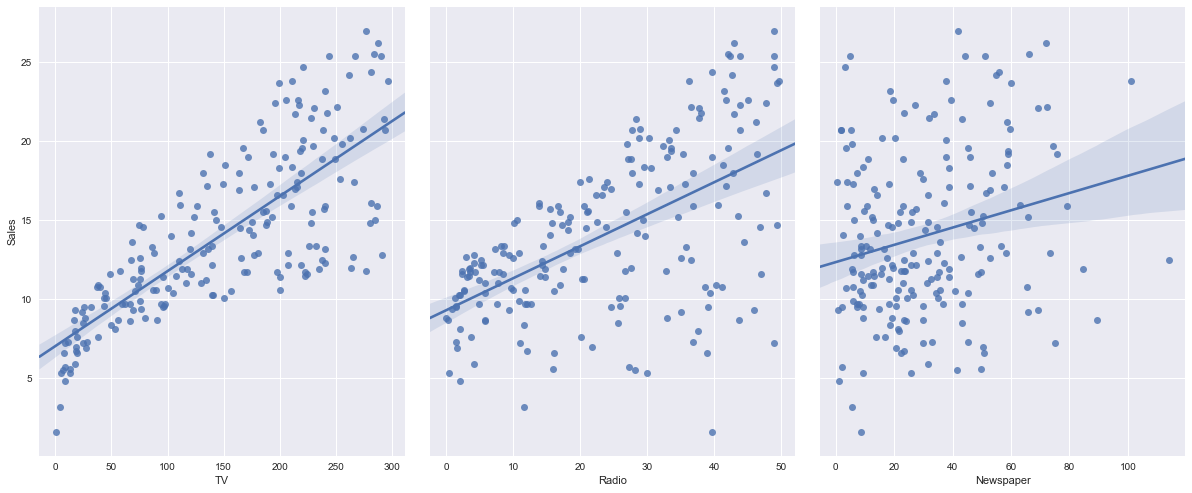

In [11]:

sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.8, kind='reg') 

# the parameter kind allow us not only to plot the liner regression model, but also to display the confidence intervals


##  2.2. Evaluation of the linear regression



In [1]:
lm1.summary()

# This method from STATMODELS sumarize all the results of the regression

NameError: name 'lm1' is not defined

From de summary it is posble to say that the model apparently explain the behavior of the data. Also, if it is chosen a value for X (it must betwen the extreme values of data) the model will predict the answer with 61 % of probability of being right. This is from the $ R^2 $ value. It is important to know that despite linear model has low variability it has a high bias because of the presumtion of data behavior. 

## Punto 3.1. Realize una clasificación

Realice una clasificación utilizando una regresión logística

In [16]:
from sklearn.datasets import load_iris

iris = load_iris()

type(iris) # special object bunch which is optimized to python and has DATA and TARGET ndarrays

sklearn.datasets.base.Bunch

In [17]:
X1 = iris.data # store features (sepal and petal lenght and widht) in a matrix of 4 columns

y1 = iris.target # store what is called the response (target) in this case there are 3 responses (0,1,2) wich correspond to a target name

### Visualizing iris data

ValueError: Invalid RGBA argument: 22.100000000000001

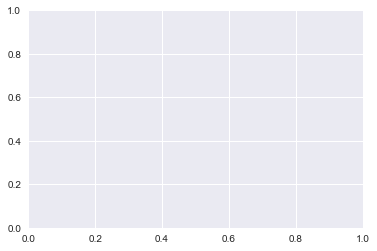

In [39]:
plt.scatter(X1[:, 0], X1[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

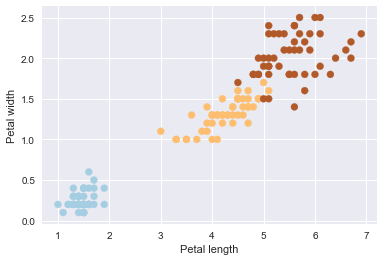

In [19]:
plt.scatter(X1[:, 2], X1[:, 3], c=y1, cmap=plt.cm.Paired)
plt.xlabel('Petal length')
plt.ylabel('Petal width')

### Preparing data using the split module

There is a especial module (train_test_split), which allow us to split the datasets into two different. Each data set includes one set of the original set. However one of them is used to fit or train the model and the other one is used to make a prediction. 

This separation is completly random in order to avoid bias. Nevertheless, it is posible to set a seed using the parameter 'random_state', so the partition will allways be the same.

In [48]:
from sklearn.cross_validation import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size= 0.4, random_state=4) 

### Important steps using scikit-learn to prepare the model

In [41]:
## 1. IMPORT THE CLASS/MODEL YOU PLAN TO USE ##
from sklearn.linear_model import LogisticRegression

## 2. Instantiate ##  (Bring the model into an object or instance)
logreg = LogisticRegression()

## 3. Fit the model with data ## 
logreg.fit(X_train,y_train)

## 4. Predict the response for a new observation
X_new = [[3,5,4,2],[5,4,3,2]]

logreg.predict(X_new) 

array([2, 0])

## 3.2. Evaluating The clasification

Obtenga al menos dos medidas del desempeño de la clasificación (e.g. accuracy, recall) 

In [22]:
y_pred_log = logreg.predict(X_test)

from sklearn import metrics

X_test.shape

(60, 4)

In [23]:
print metrics.accuracy_score(y_test,y_pred_log)

0.95


## 4. KNN algorithm

Elija otros algoritmos (cada uno algoritmos diferentes), repita los ejercicios 2 y 3 con los algoritmos elegidos y compare el desempeño entre las regresiones lineal (para regresión) y logística (para clasificación).

In [24]:
from sklearn.neighbors import KNeighborsClassifier

## 2. Instantiate ##  (Bring the model into an object or instance)
knn = KNeighborsClassifier() # by default this algorith compare an observation with the five nearest observation

## 3. Fit the model with data ## 
knn.fit(X_train,y_train)

## 4. Predict the response for a new observation
y_pred_knn = knn.predict(X_test)

In [25]:
print metrics.accuracy_score(y_test,y_pred_knn)

0.966666666667


In [26]:
knn.predict(X_new)

array([1, 1])

# KNN with 6 neighbors

In [27]:
knn_2 = KNeighborsClassifier(n_neighbors=6)

knn_2.fit(X_train,y_train)

y_pred_knn_2 = knn_2.predict(X_test) 

print metrics.accuracy_score(y_test,y_pred_knn)

0.966666666667


In [28]:
knn_2.predict(X_new)

array([1, 1])

# Selection of the best K value

In [53]:
k_range = range(1,26)
scores = []
for k in k_range:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train, y_train)
    y_pred_k = knn_k.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred_k))


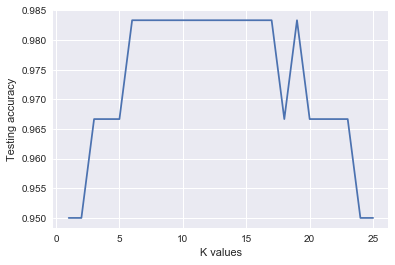

In [52]:
plt.plot(k_range, scores)
plt.xlabel('K values')
plt.ylabel('Testing accuracy')

# Taller 4

Exponer los algorithmos elegidos en el Punto 4 del Taller 3